In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np
import pandas as pd

In [13]:
def get_eucledian_distance(value1, value2):
    """
    Calculated the distance using the eculedian distance formula
    Arguments:
        value1 (int): Integer value1 
        value2 (int): Integer value 2
    Returns:
        np_distance(int): return the integer value
    """
    distance = np.sum((value1-value2)**2)
    np_distance = np.sqrt(distance)
    return np_distance

In [14]:
def calculate_knn(x_train, y_train, x_input, k):
    """
    This methods implements the K-nearset neighbours
    Arguments:
        x_train: trained data of X
        y_train: trained data of Y
        x_input: x_test data is taking as input
    """
    final_labels = []
    for item in x_input:
        distances_list = [] #Creating an empty list to append the distance calculated
        for i in range(len(x_train)):
            distance = get_eucledian_distance(np.array(x_train[i,:]), item)
            distances_list.append(distance)
        distances_array = np.array(distances_list)
        dist = np.argsort(distances_array)[:k] #Sorting the distances array
        labels = y_train[dist]
        final_labels.append(mode(labels).mode[0])
        
    return final_labels

In [26]:
def create_acc_score_and_confusion_matrix(x_train, x_test, y_train, y_test):
    """
    This methods calculates the accuracy score for the K values 1,3,5,100 and 500.
    Also displays the confusion matrix for the respective K values.
    Arguments:
        x_train - X trained data
        x_test - X test data
        y_train - Y trained data
        y_test - Y test data
    Returns:
        None - Print the accuracy score table and displays confusion matrix
    """
    k_list = [1, 3, 5, 100, 500]
    accuracy_dict = {"k": [], "accuracy_score": []}
    for k in k_list:
        prediction = calculate_knn(x_train, y_train, x_test, k)
        acc_score = accuracy_score(y_test, prediction)
        accuracy_dict["accuracy_score"].append(acc_score)
        accuracy_dict["k"].append(k)
        confusion_matrix_object = metrics.confusion_matrix(y_test, prediction)
        display = metrics.ConfusionMatrixDisplay(confusion_matrix_object)
        display.plot()
        display.ax_.set_title(f"Confusion matrix where k value is {k}")

    print(pd.DataFrame(accuracy_dict))

     k  accuracy_score
0    1        0.977778
1    3        0.977778
2    5        0.975556
3  100        0.906667
4  500        0.724444


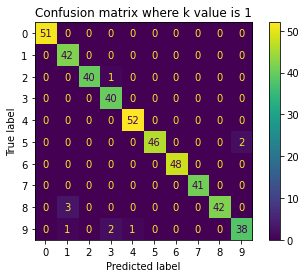

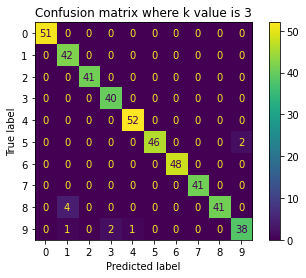

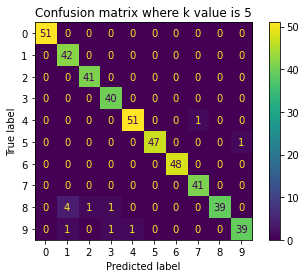

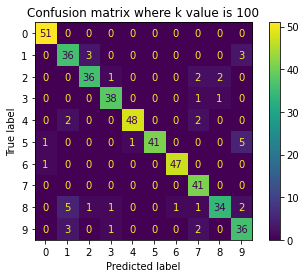

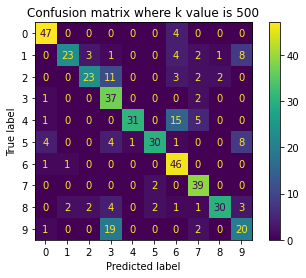

In [27]:
digits = datasets.load_digits() #Loading dataset
data = digits.data
target = digits.target
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, random_state=123
) #Spliting into train dataset and test dataset
create_acc_score_and_confusion_matrix(x_train, x_test, y_train, y_test)